<p style="text-align:center;font-family:Georgia;color:crimson;font-size:24px;"> Supermarket store branches sales analysis.</p>

        
* `Store ID` : (Index) ID of the particular store.

* `Store_Area` : Physical Area of the store in yard square.

* `Items_Available` : Number of different items available in the corresponding store.

* `Daily_Customer_Count` : Number of customers who visited to stores on an average over month.

* `Store_Sales` : Sales in (US $) that stores made.



<p style="font-size:28px;"> At first we need to import all libraries we need for visualization</p>


<p style="font-size:22px;"> Import All Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<p style="font-size:22px;"> Import DataSet</p>


In [2]:
df = pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')

<p style="font-size:22px;"> Data Overview</p>


> We use the data overview to see a summary of the dataset

In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


> Store ID does not help us and we can delete it from the table for easier analysis

In [5]:
df = df.drop(['Store ID '], axis= 1)


> Let's see how many missing data we have

In [6]:
df.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [7]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000



> With correlation, we can understand how much our data is related to each other

In [8]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


* `The above table shows us that the available items have a higher correlation with sales, even more than the number of customers and the area of ​​the shop`

<p style="text-align:center;font-family:Georgia;color:MediumSeaGreen;font-size:24px;"> Let's go to do data visualization</p>

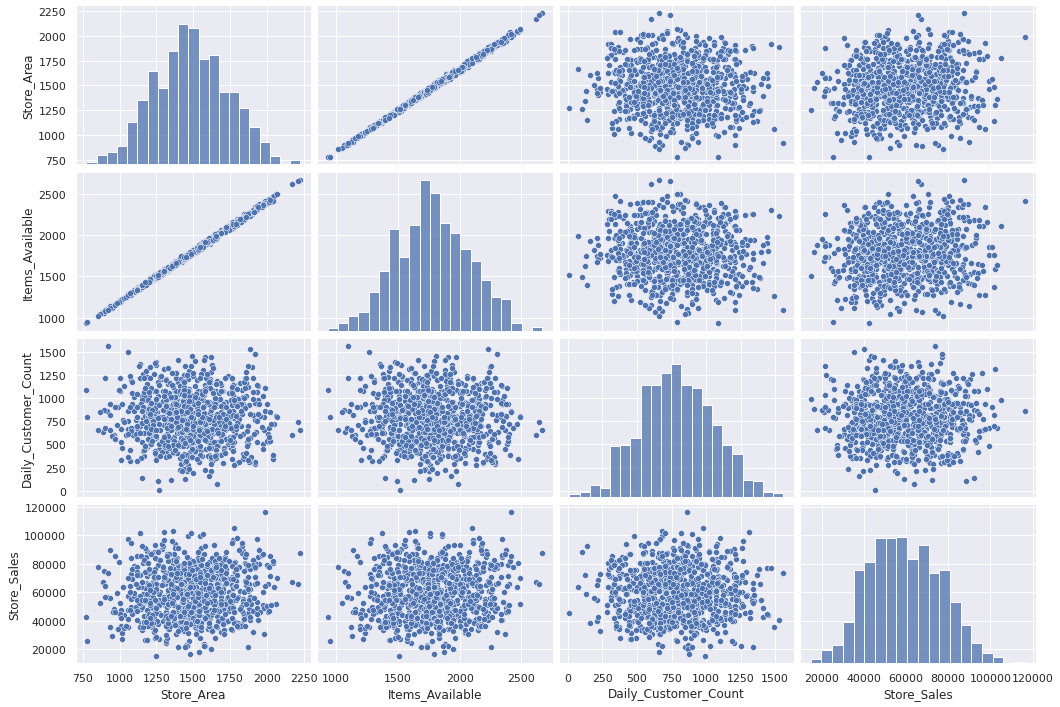

In [9]:
sns.pairplot(df, aspect=1.5)


* According to the graphs above, we realized that increasing the items or the area of the store does not affect the sales

* But as the area of ​​the shop increases, the number of items increases and it has a linear graph, and this is almost predictable and does not give us much information.

<Figure size 4000x2000 with 0 Axes>

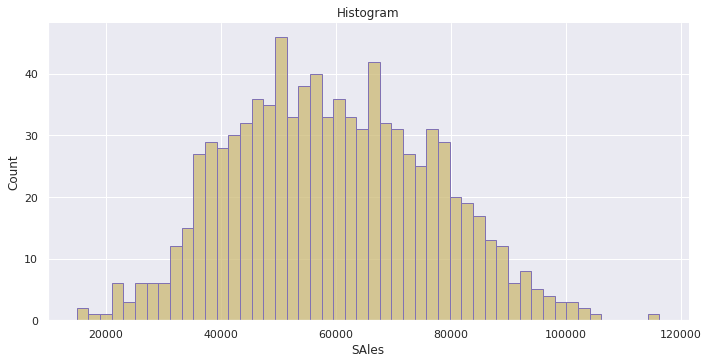

In [10]:
plt.figure(figsize=(20,10), dpi=200)
sns.displot(data=df, x='Store_Sales' ,bins=50, color='y', edgecolor='m', aspect=2)

plt.title('Histogram')
plt.xlabel('SAles')


plt.savefig('H')

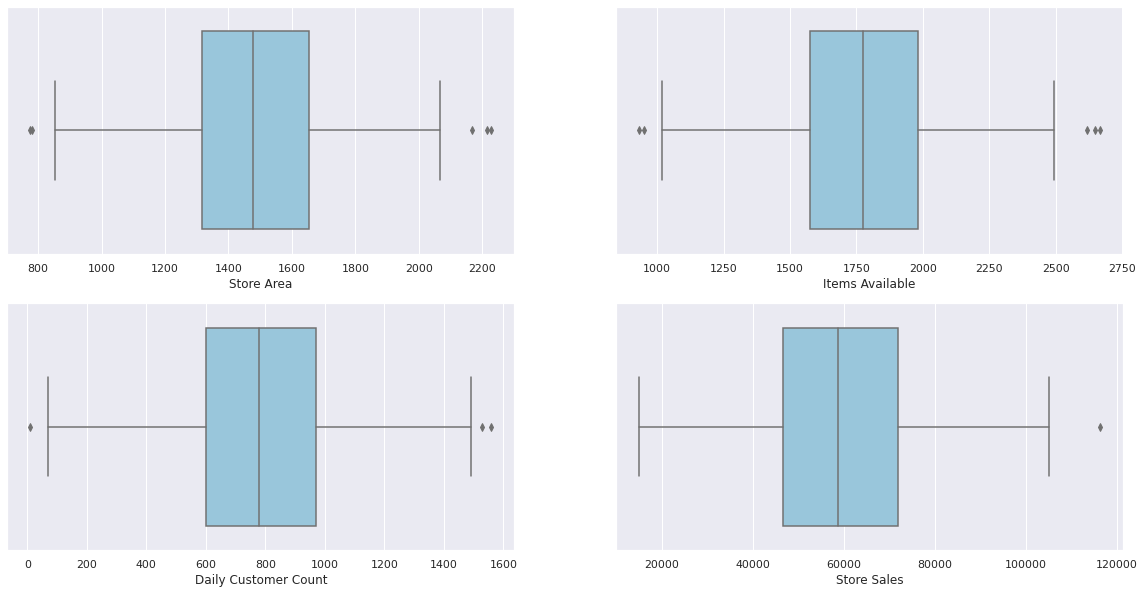

In [11]:
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

ax1 = sns.boxplot(x = df['Store_Area'], color= '#8ecae6', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.boxplot(x = df['Items_Available'], color= '#8ecae6', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.boxplot(x = df['Daily_Customer_Count'], color= '#8ecae6', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.boxplot(x = df['Store_Sales'], color= '#8ecae6', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()
